In [101]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [102]:
import os
current_directory = os.getcwd()
while current_directory.endswith("Notebooks"):
    os.chdir("..")
    current_directory = os.getcwd()
    print("Current working directory: ", current_directory)

In [103]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from utils.filepaths.filepaths import FILE_PATH_FLOW_LOOP_DATA
from utils.utils.utils import define_threshold
import seaborn as sns
sns.set_theme()

In [104]:
with open(FILE_PATH_FLOW_LOOP_DATA, 'r')as file:
    data = file.readlines()
    changed_data = []
    for line in data:
        changed_line = line.strip().split('\t')
        changed_data.append(changed_line)
        

In [105]:
df = pd.DataFrame(data=changed_data[1:], columns = changed_data[0])
df = df.drop(index = 0)
print(df["mean Flow"].unique())
print

['0.0017941' '0.00179726' '0.00179854' '0.00179589' '0.00297266'
 '0.00298566' '0.0029875' '0.0029899' '0.00417413' '0.00418611'
 '0.00417812' '0.00416961' '0.0053804' '0.00538658' '0.00538666'
 '0.0053873' '0.00618247' '0.00628872' '0.00621486' '0.00623429'
 '9.16098e-05' '0.00290019' '0.00296578' '0.00297387' '0.00417921'
 '0.00418587' '0.00419267' '0.0053935' '0.00538714' '0.00538615'
 '0.00622752' '0.00626295' '0.0062598' '0.00619306' '0.00179572'
 '0.00179498' '0.00297299' '0.00298126' '0.00297471' '0.00418402'
 '0.00418519' '0.00418408' '0.00540465' '0.00540267' '0.00538042'
 '0.00634991' '0.0063651' '0.00636031' '0.00297725' '0.00300036'
 '0.00298531' '0.00299483' '0.00299296' '0.00299885' '0.00296118'
 '0.00421183' '0.00418259' '0.00418523' '0.00418606' '0.00418363'
 '0.00419008' '0.00298136' '0.00418956' '0.00418927' '0.00419036'
 '0.00418677' '0.00418901' '0.00419011' '0.00419013' '0.00418802'
 '0.00420685' '0.00419007' '0.00419451' '0.00419131' '0.0041895'
 '0.00418978' '0.0

<function print(*args, sep=' ', end='\n', file=None, flush=False)>

In [106]:
df["Eccentricity"].unique()
df = df[df["Cuttings conc quality"]=='1']
print(df.columns)

Index(['mean File name', 'mean StartTime', 'mean EndTime', 'mean DPT1',
       'mean DPT2', 'mean DPT3', 'mean Torque', 'mean MudDensity',
       'mean Tankweight', 'mean TempTank', 'mean SandRate', 'mean Flow',
       'mean DPT4', 'mean DPR1', 'mean DPR2', 'mean TestSectionWeight',
       'mean SetPoint', 'mean USL', 'mean StringRPM',
       'mean relBedHeightTankWeight', 'mean relBedHeightTestSectionWeight',
       'mean fricCoeff', 'std DPT1', 'std DPT2', 'std DPT3', 'std Torque',
       'std MudDensity', 'std Tankweight', 'std TempTank', 'std SandRate',
       'std Flow', 'std DPT4', 'std DPR1', 'std DPR2', 'std TestSectionWeight',
       'std SetPoint', 'std USL', 'std StringRPM',
       'std relBedHeightTankWeight', 'std relBedHeightTestSectionWeight',
       'std fricCoeff', 'drift DPT1', 'drift DPT2', 'drift DPT3',
       'drift Torque', 'drift MudDensity', 'drift Tankweight',
       'drift TempTank', 'drift SandRate', 'drift Flow', 'drift DPT4',
       'drift DPR1', 'drift DPR

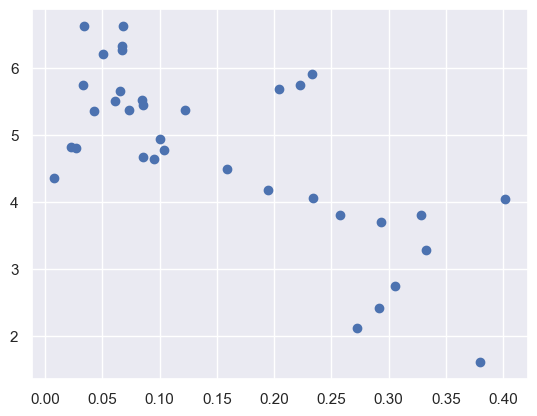

In [108]:
df_for_torque = df[(df['Inclination'] == '90') & (df['Eccentricity'] == '1') & df['mean relBedHeightTestSectionWeight'].astype("float32") > 0]

plt.scatter(df_for_torque["mean relBedHeightTestSectionWeight"].astype("float32"), df_for_torque["mean Torque"].astype("float32"))

In [76]:
df.head()
print(df["is laminar pipe?"].unique())
inclination_mapping = {'90' : 90 * np.pi / 180, '60' : 60*np.pi / 180, '48' : 48 * np.pi / 180}
df["Inclination"] = df["Inclination"].map(inclination_mapping)
fluid_mapping = {'EMSVersatec' : 2.0, 'Glydril': 1.0}
df["Fluid name"] = df["Fluid name"].map(fluid_mapping)

['0']


In [77]:
print(df["Cuttings conc quality"].unique())
# No flow behavior index since I am not sure if I can use that for field data
# Friction coefficient had many nan values. See what to do about this later
# Might not need it as you probably do not have it for field
print(df["Eccentricity"].unique())
# df = df[df["Inclination"] == "90"]
dict_of_variables = {
    "$H_{rel}$" : df["mean relBedHeightTestSectionWeight"].astype('float32'),
    "$Re$" : df["Reynolds annulus (no cuttings)"].astype("float32"),
    "$Ta$" : df["Taylor number"].astype("float32"),
    "$S_p$" : df["Particle slip ratio in test section"].astype('float32'),
    "$\epsilon$" : df["Eccentricity"].astype("float32"),
    r"$\beta$" : df["Inclination"],
    "$Sh$" : df["Shields number"].astype("float32"),
    "Fluid type" : df["Fluid name"],
    # "Froude" : df["Froude number"].astype("float32"),
    # 'Reynolds by Bingham' : df["Reynolds annulus (no cuttings)"].astype("float32") * df["Bingham number"].astype("float32"),
    '$Bh$' : df["Bingham number"].astype("float32"),
    '$f$' : df["Friction factor mod annulus"].astype("float32"),
    # 'Reynolds by taylor' : df["Reynolds annulus (no cuttings)"].astype("float32") / df["Taylor number"].astype("float32")
    # "Friction coef" : df["mean fricCoeff"].astype("float32"),
}
df = pd.DataFrame(dict_of_variables)
# df = df[(df.drop(columns=["Inclination"])>0).all(axis=1)]
df = df[(df>0).all(axis = 1)]

['1']
['1' '0.5']


<>:12: SyntaxWarning: invalid escape sequence '\e'
<>:12: SyntaxWarning: invalid escape sequence '\e'
C:\Users\thomaswi\AppData\Local\Temp\ipykernel_21888\4286539203.py:12: SyntaxWarning: invalid escape sequence '\e'
  "$\epsilon$" : df["Eccentricity"].astype("float32"),


In [78]:

threshold = define_threshold(df["$S_p$"].values,rel_bed_height=df["$H_{rel}$"], height_threshold=0.0575)
print(threshold)

0.392291


In [79]:
df["$S_p$"] = df["$S_p$"].apply(lambda x: 0 if x > threshold else 1)
targets =df["$S_p$"].astype("float32").values
df = df.drop(columns = "$S_p$")

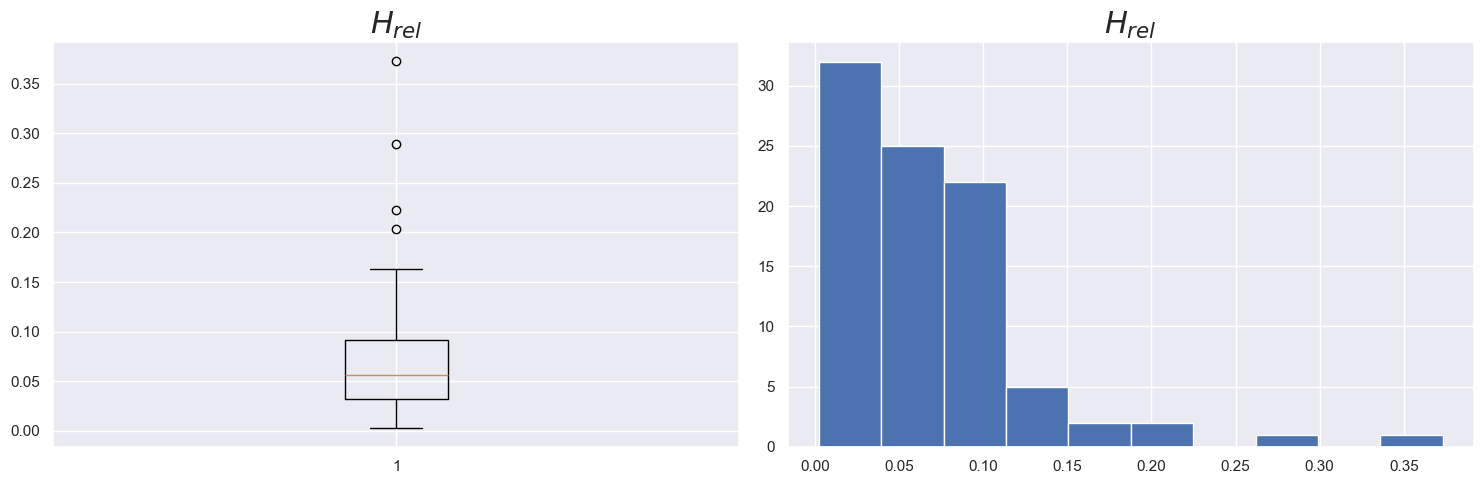

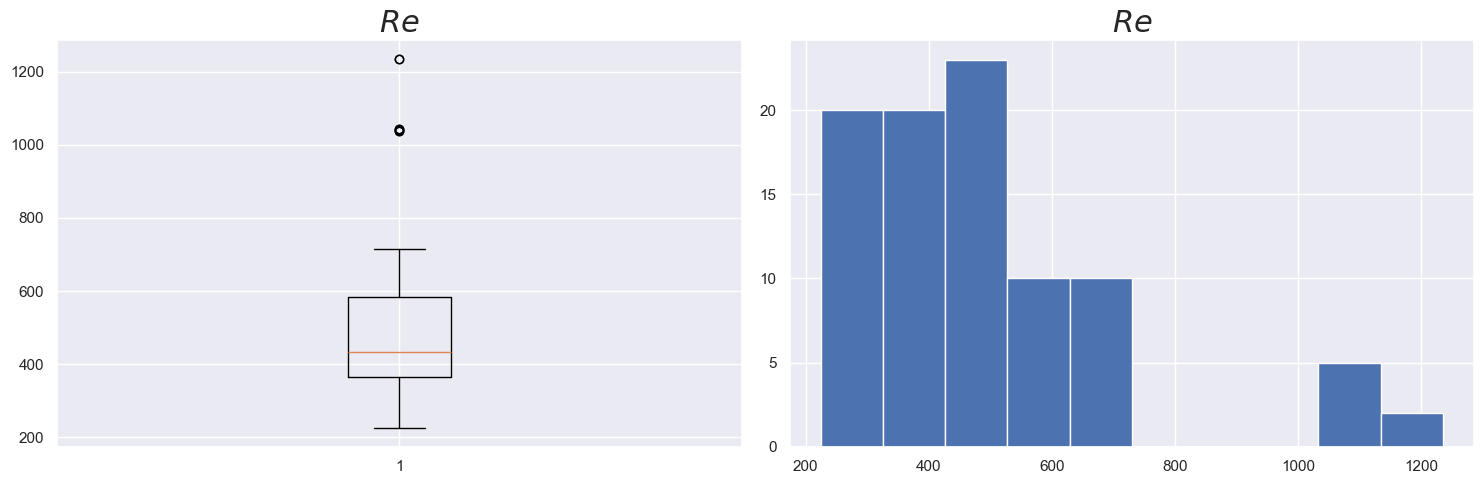

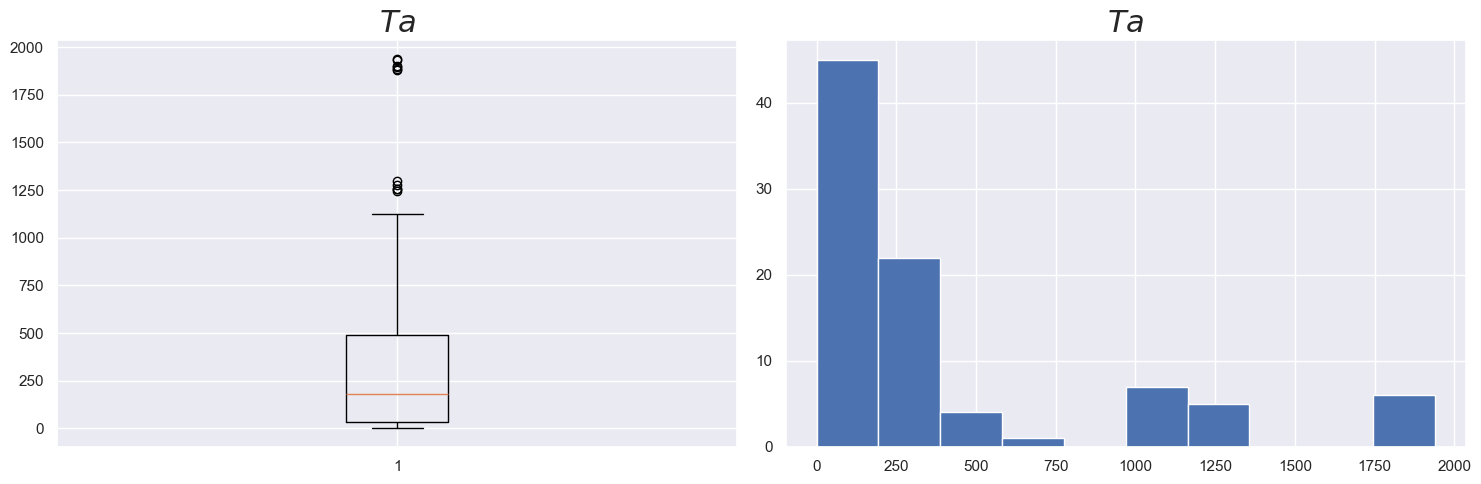

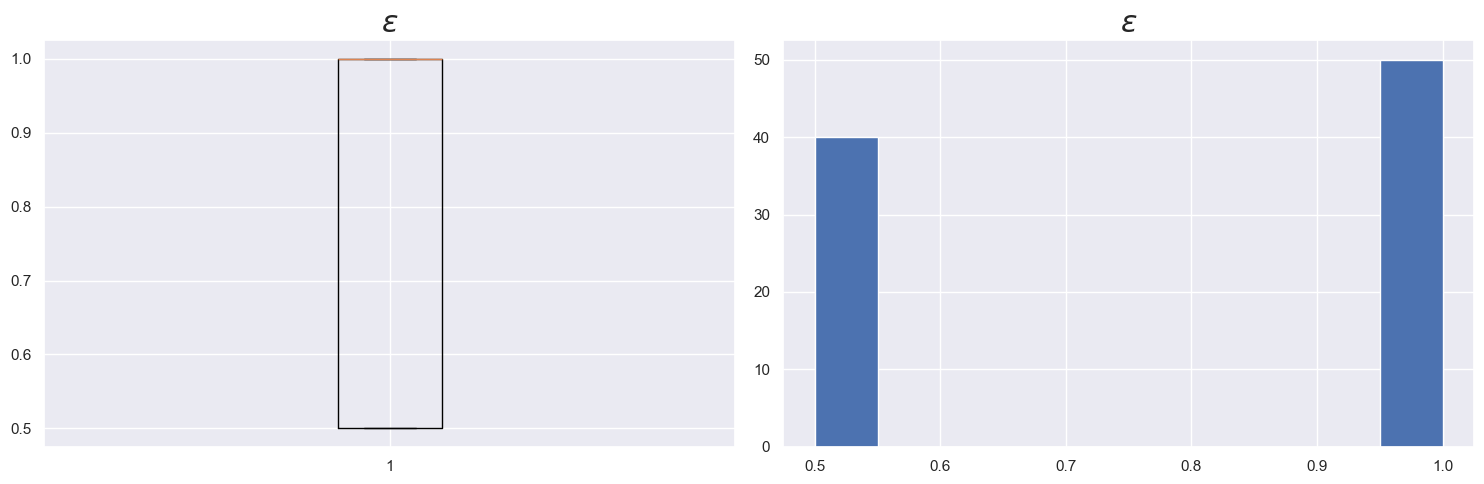

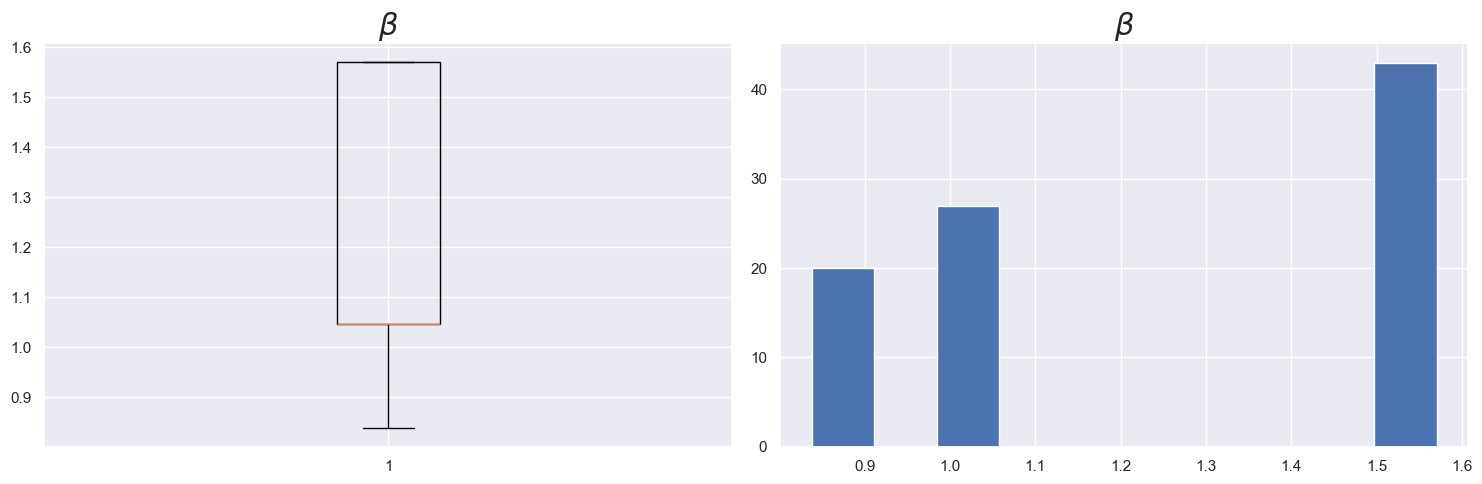

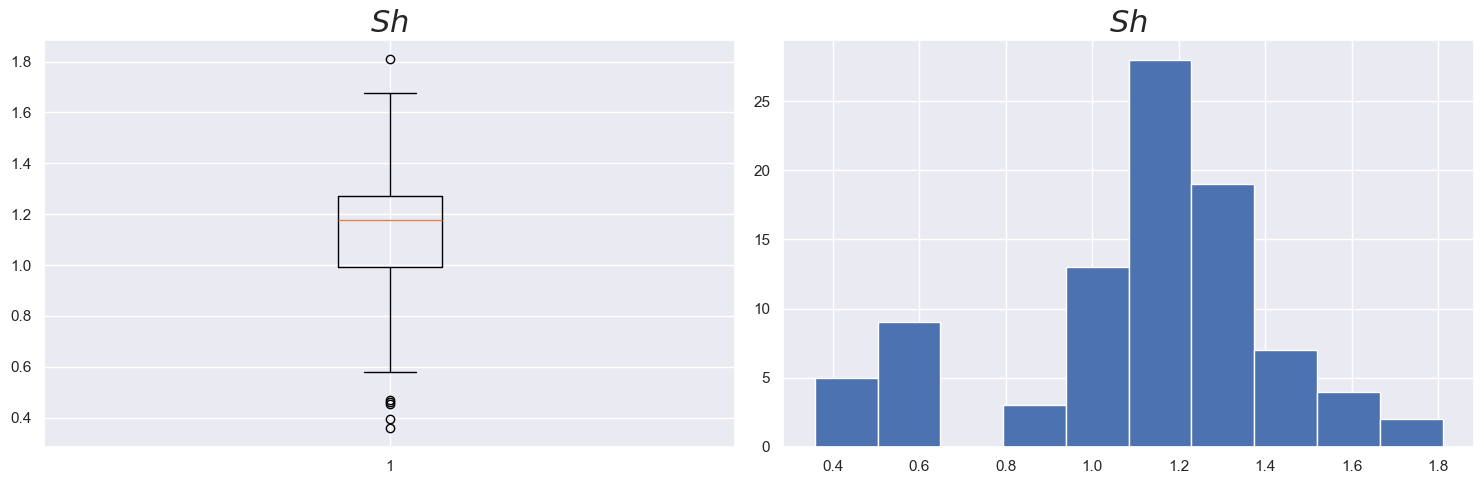

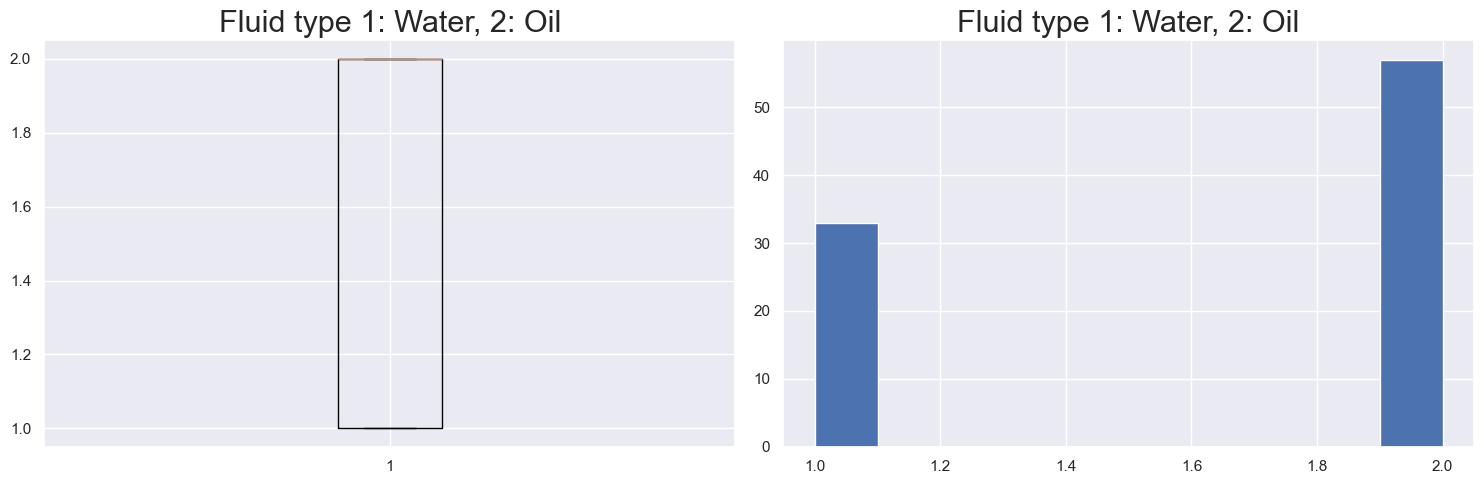

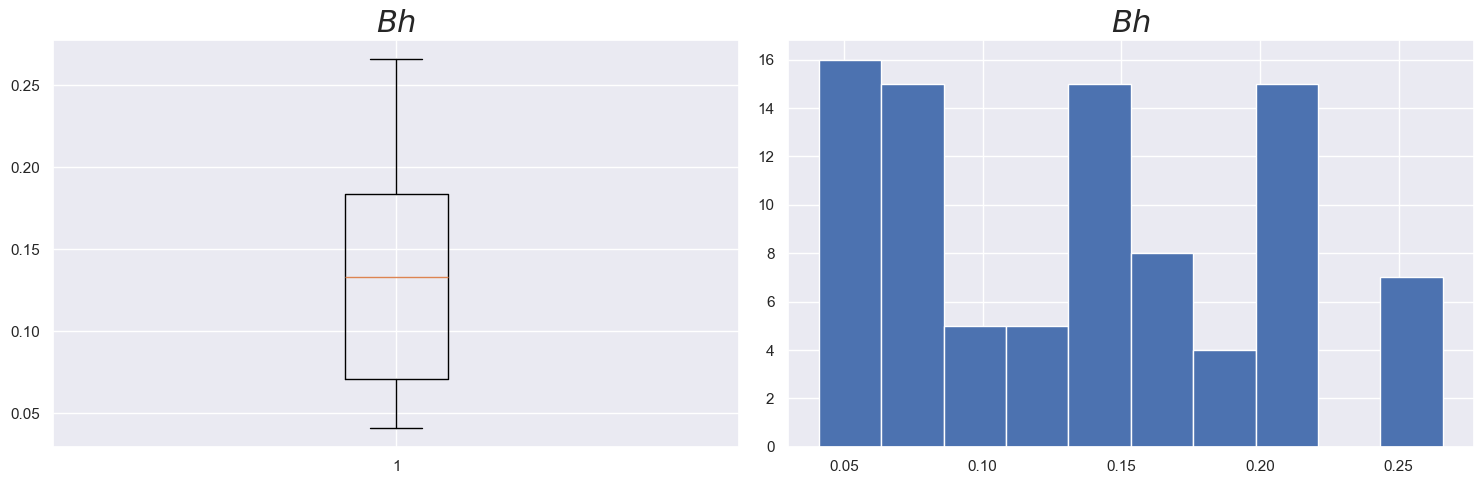

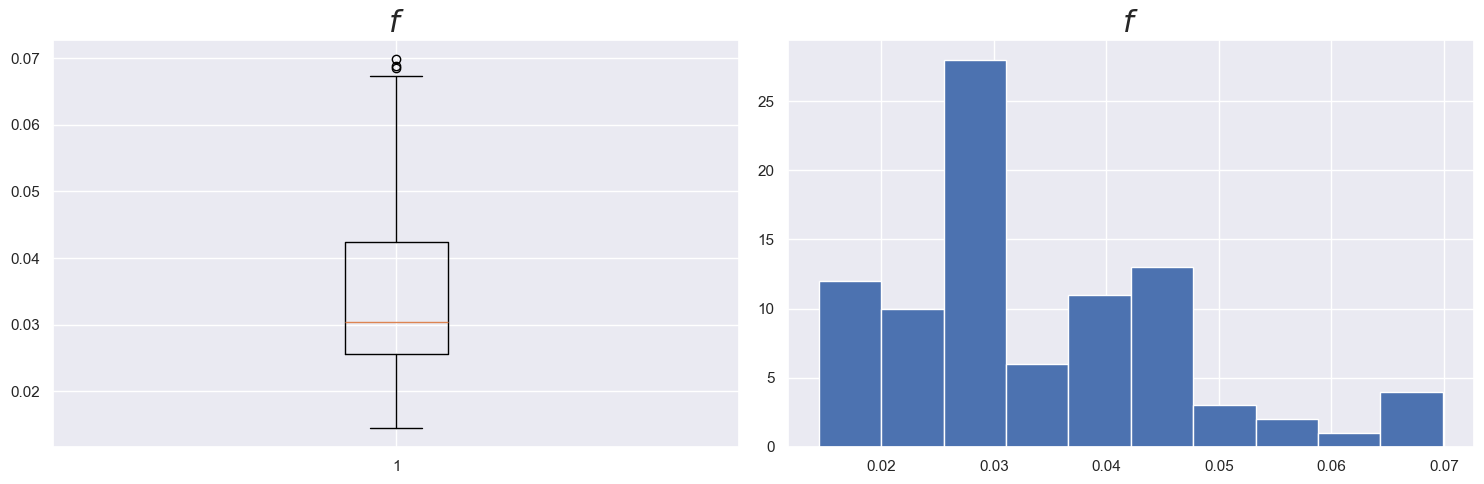

In [80]:
from operator import itemgetter
colors = ['C0' if target == 0 else 'C1' for target in targets]

for index,column in enumerate(df.columns):
    fig, ax = plt.subplots(1, 2, figsize = (15,5))
    column_title = column
    if column == "Fluid type":
        column_title = "Fluid type 1: Water, 2: Oil" 
    ax[0].set_title(f"{column_title}",fontsize = 22)
    ax[0].boxplot(df[column].values)

    ax[1].set_title(f"{column_title}",fontsize = 22)
    ax[1].hist(df[column].values)
    plt.tight_layout()

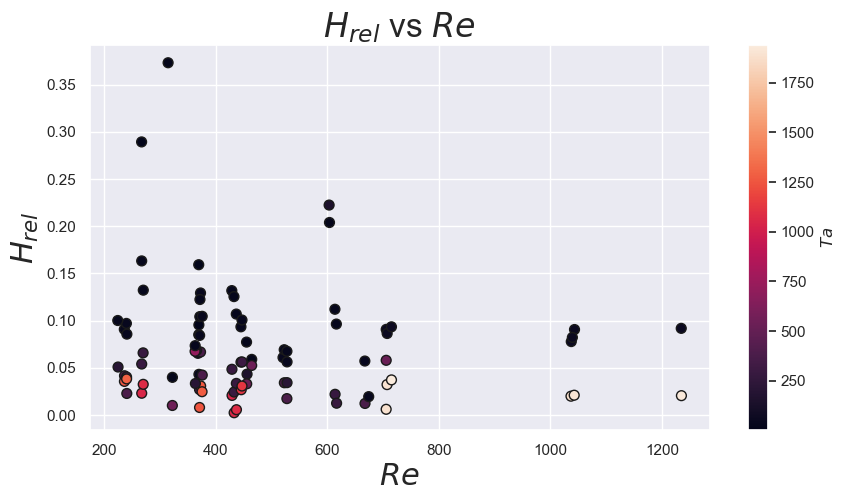

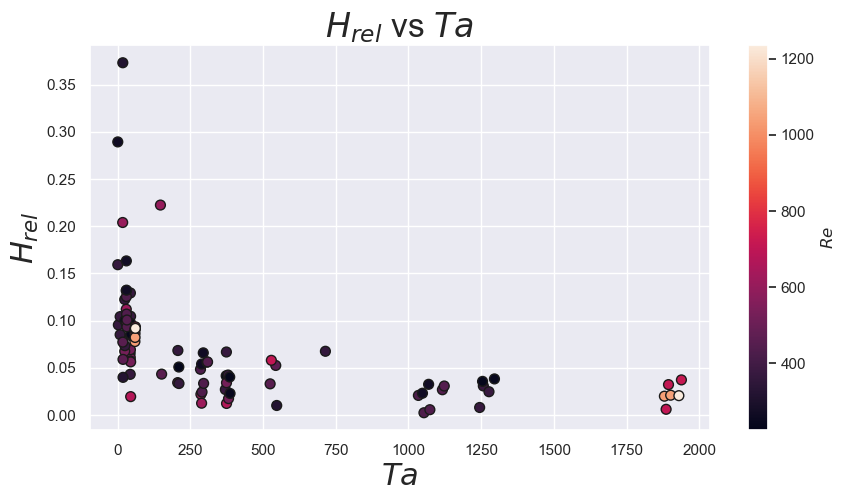

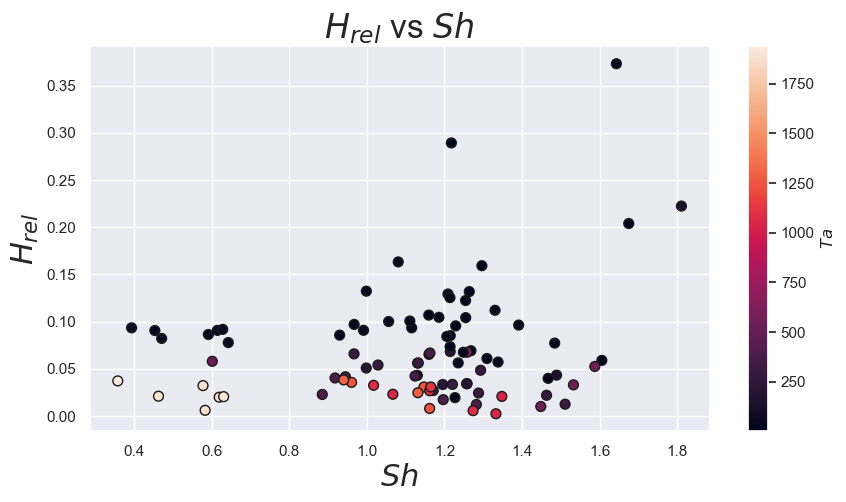

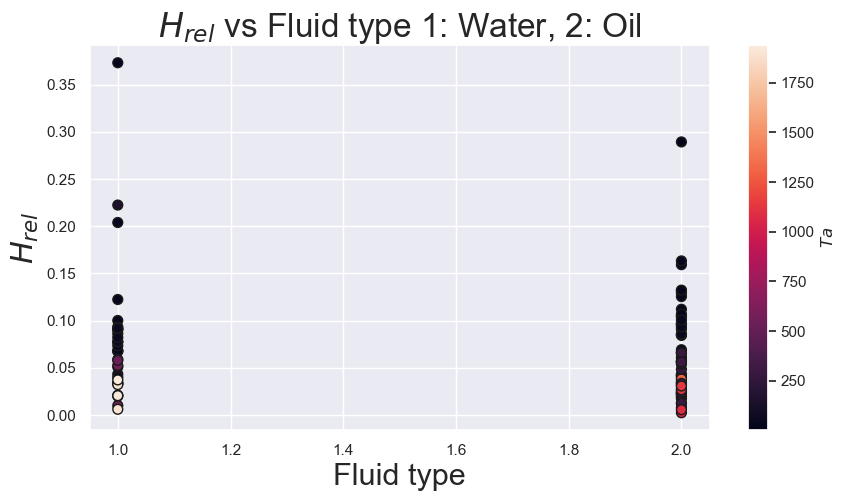

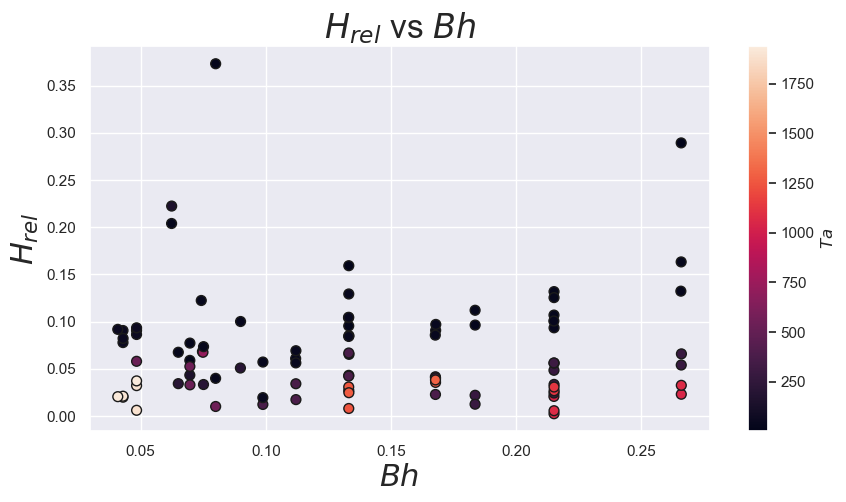

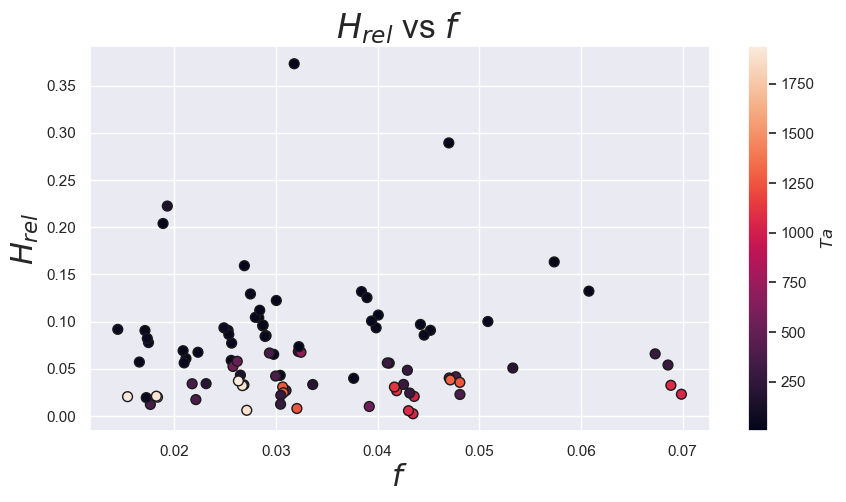

In [ ]:
target_column = "$H_{rel}$"
for i, column in enumerate(df.drop(columns=["$H_{rel}$",r"$\beta$",r"$\epsilon$"]).columns):
    column_title = column
    if column == "$Ta$":
        map = "$Re$"
    else:
        map = "$Ta$"
    if column == "Fluid type":
        column_title = "Fluid type 1: Water, 2: Oil"

    plt.figure(figsize=(10,5))
    plt.title(f"{target_column} vs {column_title}",fontsize = 24)
    scatter = plt.scatter(df[column].values,df['$H_{rel}$'].values, c = df[map].values, edgecolor = "k", s = 50)
    plt.ylabel("$H_{rel}$",fontsize = 22)
    plt.xlabel(column,fontsize = 22)
    colorbar = plt.colorbar(scatter)
    colorbar.set_label(map)
    plt.show()

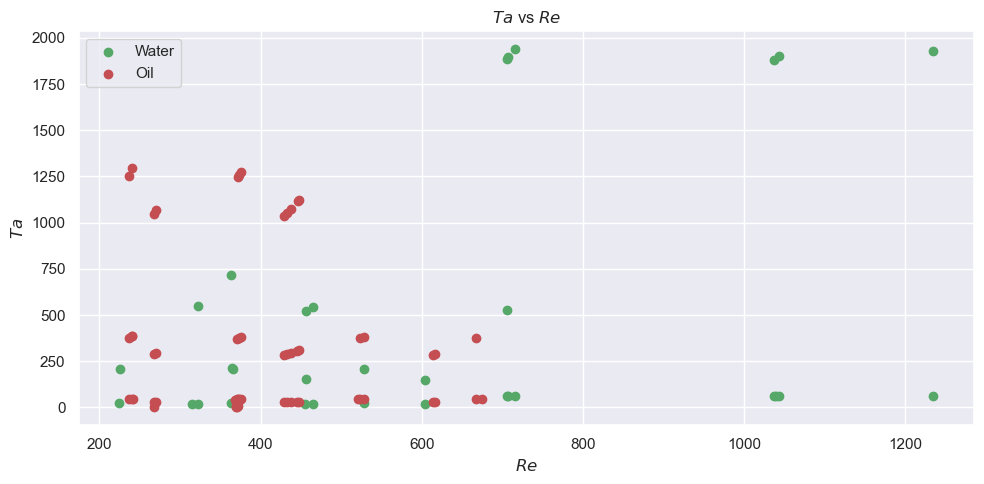

In [82]:
fig, ax = plt.subplots(1, figsize = (10,5))
fluid_types = [1.0,2.0]
fluid_map = {1.0 : "Water", 2.0 : "Oil"}
colors_fluid = ["C2","C3"]
for idx,fluid_type in enumerate(fluid_types):
    df_subset  = df[df["Fluid type"] == fluid_type]
    ax.set_title("$Ta$ vs $Re$")
    ax.scatter(df_subset['$Re$'].values,df_subset['$Ta$'].values, color = colors_fluid[idx], label = fluid_map[fluid_type])
    ax.set_ylabel("$Ta$")
    ax.set_xlabel("$Re$")
    ax.legend()

plt.tight_layout()

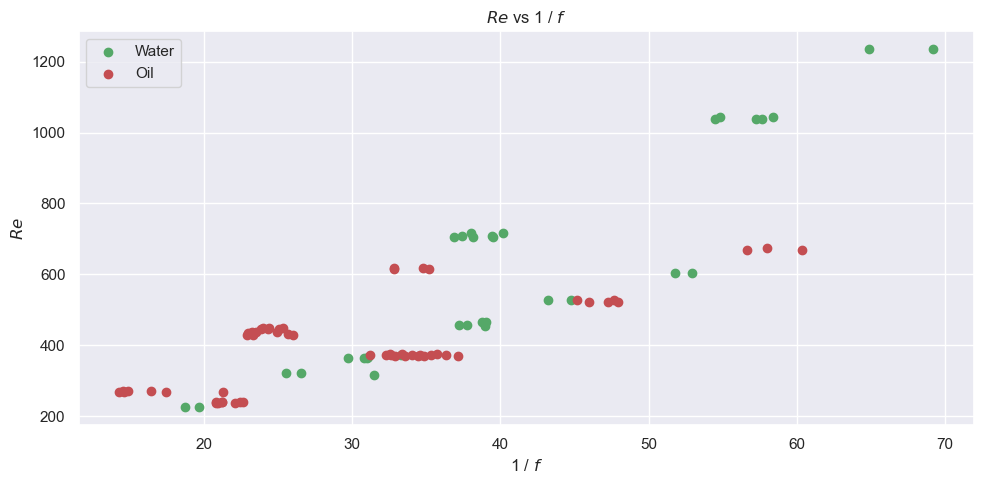

In [83]:
fig, ax = plt.subplots(1, figsize = (10,5))
for idx, fluid_type in enumerate(fluid_types):
    df_subset  = df[df["Fluid type"] == fluid_type]
    ax.set_title("$Re$ vs 1 / $f$")
    ax.scatter(1 / df_subset['$f$'].values,df_subset['$Re$'].values, color = colors_fluid[idx], label = fluid_map[fluid_type])
    ax.set_ylabel("$Re$")
    ax.set_xlabel("1 / $f$")
    ax.legend()
plt.tight_layout()

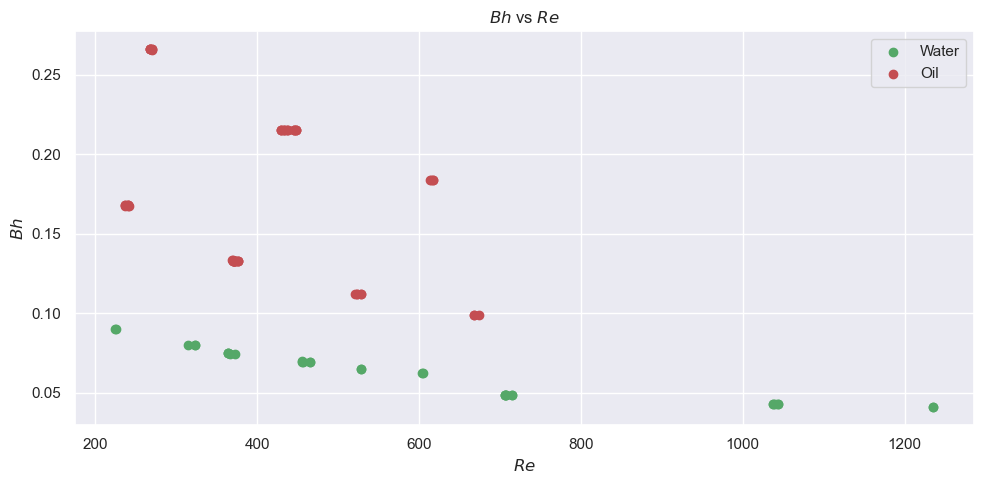

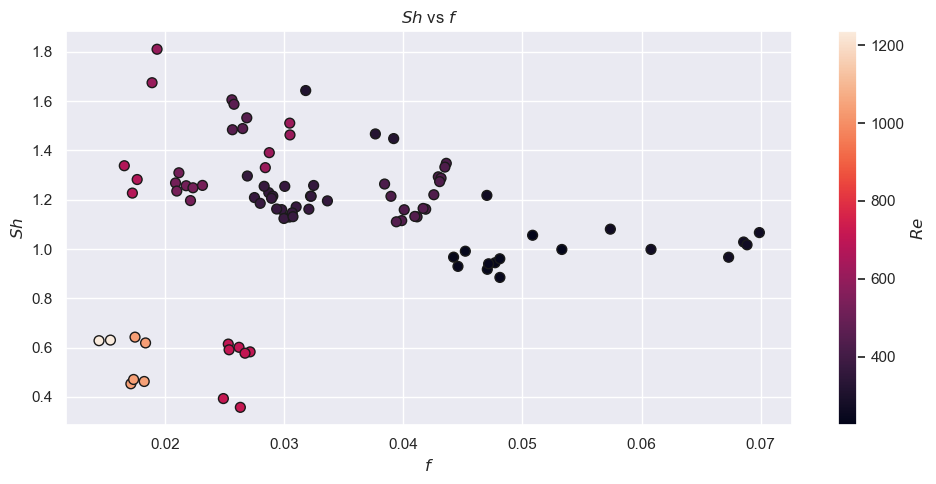

In [84]:
fig, ax = plt.subplots(1, figsize = (10,5))
for idx, fluid_type in enumerate(fluid_types):
    df_subset = df[df["Fluid type"] == fluid_type]
    ax.set_title("$Bh$ vs $Re$")
    ax.scatter(df_subset['$Re$'].values,df_subset['$Bh$'].values, color = colors_fluid[idx],label = fluid_map[fluid_type])
    ax.set_ylabel("$Bh$")
    ax.set_xlabel("$Re$")
    ax.legend()
plt.tight_layout()
fig, ax = plt.subplots(1, figsize = (10,5))
ax.set_title("$Sh$ vs $f$")
scatter = ax.scatter(df['$f$'].values,df['$Sh$'].values, c = df["$Re$"].values, edgecolor = "k", s = 50)
ax.set_ylabel("$Sh$")
ax.set_xlabel("$f$")
colorbar = plt.colorbar(scatter)
colorbar.set_label("$Re$")
plt.tight_layout()

<>:8: SyntaxWarning: invalid escape sequence '\e'
<>:9: SyntaxWarning: invalid escape sequence '\e'
<>:11: SyntaxWarning: invalid escape sequence '\e'
<>:8: SyntaxWarning: invalid escape sequence '\e'
<>:9: SyntaxWarning: invalid escape sequence '\e'
<>:11: SyntaxWarning: invalid escape sequence '\e'
C:\Users\thomaswi\AppData\Local\Temp\ipykernel_21888\1735353614.py:8: SyntaxWarning: invalid escape sequence '\e'
  ax.set_title("$Ta$ vs $\epsilon$")
C:\Users\thomaswi\AppData\Local\Temp\ipykernel_21888\1735353614.py:9: SyntaxWarning: invalid escape sequence '\e'
  ax.scatter(df['$\epsilon$'].values,df['$Ta$'].values, color = colors)
C:\Users\thomaswi\AppData\Local\Temp\ipykernel_21888\1735353614.py:11: SyntaxWarning: invalid escape sequence '\e'
  ax.set_xlabel("$\epsilon$")


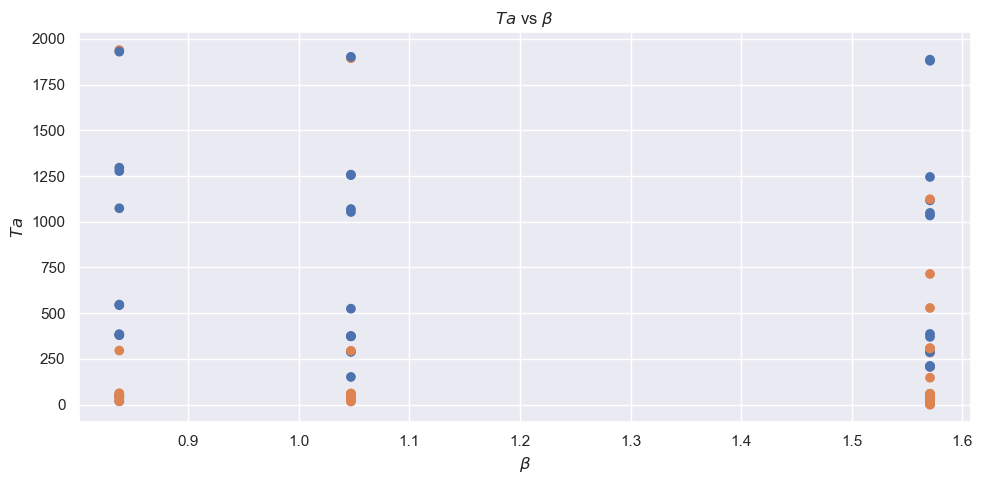

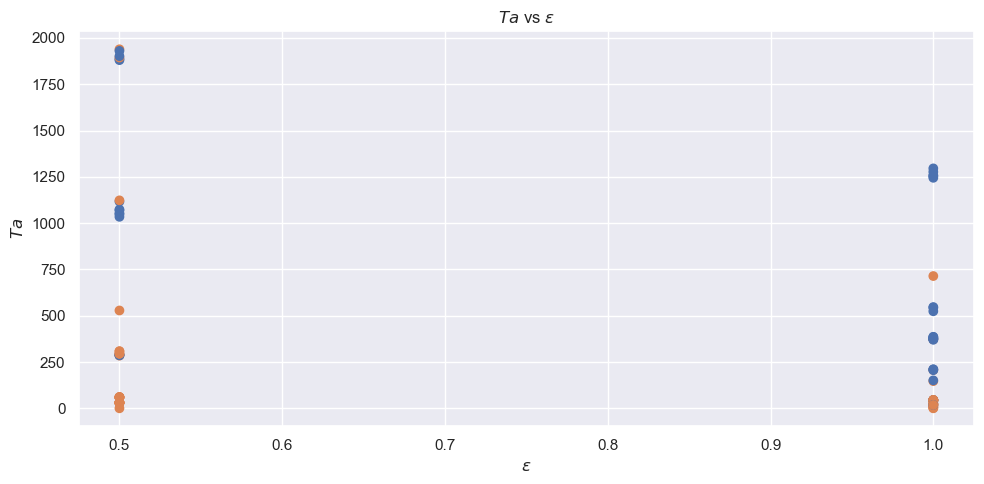

In [85]:

fig, ax = plt.subplots(1, figsize = (10,5))
ax.set_title(r"$Ta$ vs $\beta$")
ax.scatter(df[r'$\beta$'].values,df['$Ta$'].values, color = colors)
ax.set_ylabel("$Ta$")
ax.set_xlabel(r"$\beta$")
plt.tight_layout()
fig, ax = plt.subplots(1, figsize = (10,5))
ax.set_title("$Ta$ vs $\epsilon$")
ax.scatter(df['$\epsilon$'].values,df['$Ta$'].values, color = colors)
ax.set_ylabel("$Ta$")
ax.set_xlabel("$\epsilon$")
plt.tight_layout()

In [86]:
# n_bins = 20
# fig, ax = plt.subplots(2, figsize = (10,10))
# good_ta = [taylor for taylor, target in zip(df['$Ta$'], df['$S_p$']) if target == 0.0]
# bad_ta = [taylor for taylor, target in zip(df['$Ta$'], df['$S_p$']) if target > 0.0]
# good_bh = [bingham for bingham, target in zip(df['$Bh$'], df['$S_p$']) if target == 0.0]
# bad_bh = [bingham for bingham, target in zip(df['$Bh$'], df['$S_p$']) if target > 0.0]
# bingham_bins = np.histogram_bin_edges(df['$Bh$'], bins=n_bins)
# df['bingham_bin'] = pd.cut(df['$Bh$'], bins=bingham_bins)





# taylor_value_each_bin = df.groupby('bingham_bins')['$Ta$'].agg(min_taylor=('min'), max_taylor=('max'), mean_taylor = ('mean'))
# ax[0].set_title("Distribution of Bingham numbers")
# ax[0].hist([good_bh,bad_bh], bins = n_bins, color = ['C0', 'C1'])
# ax[1].set_title("Distribution of Taylor numbers")
# ax[1].hist([good_ta,bad_ta], bins = n_bins, color = ['C0', 'C1'])

# for i, (bingham_bin, row) in enumerate(taylor_value_each_bin.iterrows()):
#     if row['max_taylor'] == np.NAN:
#         pass
#     else:
#         ax[0].annotate(
#             f"Taylor: {row['min_taylor']:.1f}-{row['max_taylor']:.1f}/{row['mean_taylor']:.1f}",
#             xy=(bingham_bins[i] + (bingham_bins[i+1] - bingham_bins[i])/2, 5),  # Position above bin
#             ha='center', color='black', fontsize=8, rotation=90
#     )

In [87]:
# print(taylor_value_each_bin)